<img align="left" src = https://project.lsst.org/sites/default/files/Rubin-O-Logo_0.png width=170 style="padding: 10px"> 
<b>Little Demo: Galaxy CMD (Color-Magnitude Diagram)</b> <br>
Contact author(s): Melissa Graham <br>
Last verified to run: 2023-05-11 <br>
LSST Science Pipelines version: Weekly 2023_07 <br>
Container Size: medium

Create a galaxy color-magnitude diagram (CMD).

**Option** to create the same CMD in the Portal in Section 4. <br>

## 1. Set up

Import packages.

In [1]:
import matplotlib.pyplot as plt
from lsst.rsp import get_tap_service, retrieve_query

Instantiate the TAP service.

In [2]:
service = get_tap_service()

/tmp/ipykernel_12993/1920553455.py:1: DeprecationWarning: get_tap_service() is deprecated, use get_tap_service("tap")
  service = get_tap_service()


## 2. TAP query

Define the TAP query to retrieve ~40,000 bright extended Objects. The Object catalog contains sources detected in deep coadds.

In [3]:
query = "SELECT scisql_nanojanskyToAbMag(g_calibFlux) as gmag, " + \
        "scisql_nanojanskyToAbMag(r_calibFlux) as rmag " + \
        "FROM dp02_dc2_catalogs.Object " + \
        "WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec), " + \
        "CIRCLE('ICRS', 55.75, -32.27, 0.4)) = 1 " + \
        "AND detect_isPrimary = 1 " + \
        "AND g_extendedness = 1 AND r_extendedness = 1 " + \
        "AND scisql_nanojanskyToAbMag(g_calibFlux) < 25 " + \
        "AND scisql_nanojanskyToAbMag(r_calibFlux) < 25 "

Execute the query, and store the results in an `astropy` table.

In [4]:
results = service.search(query).to_table()

Uncomment the following cell to view the table.

In [5]:
# results

## 3. Create the CMD

Plot g-r color vs. g-band magnitude as a scatter plot.

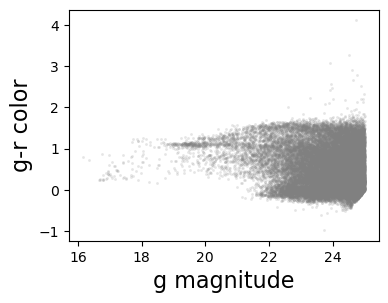

In [6]:
plt.figure(figsize=(4,3))
plt.plot(results['gmag'], results['gmag'] - results['rmag'], 
         'o', ms=2, color='grey', alpha=0.2, mew=0)
plt.xlabel('g magnitude', fontsize=16)
plt.ylabel('g-r color', fontsize=16)
plt.show()

Plot g-r color vs. g-band magnitude as a heatmap (2-d histogram).

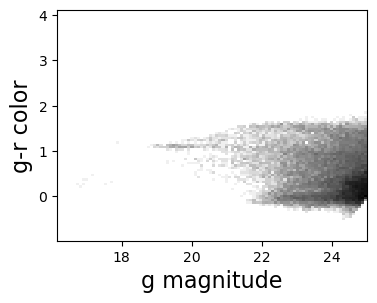

In [7]:
plt.figure(figsize=(4,3))
plt.hist2d(results['gmag'], results['gmag'] - results['rmag'], 
           bins=100, cmap='Greys', norm='log')
plt.xlabel('g magnitude', fontsize=16)
plt.ylabel('g-r color', fontsize=16)
plt.show()

Matplotlib offers a variety of <a href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">colormaps</a> to choose from.

Pick a different colormap.
Substitute its name in for "Greys" in the above code cell.
Re-execute the cell above to create a prettier plot.

## 4. Repeat in the Portal

**Option** to execute the same query in the Portal.

4.1. Go to <a href="https://data.lsst.cloud/">data.lsst.cloud</a> in a new browser tab, and enter the Portal aspect.

4.2. In the Portal, next to “2. Select Query Type”, switch from the default “Single Table (UI assisted)” to “Edit ADQL (advanced)”.

4.3. Copy and paste the following into the "ADQL Query" box.
```
SELECT scisql_nanojanskyToAbMag(g_calibFlux) as gmag, 
scisql_nanojanskyToAbMag(r_calibFlux) as rmag 
FROM dp02_dc2_catalogs.Object 
WHERE CONTAINS(POINT('ICRS', coord_ra, coord_dec), 
               CIRCLE('ICRS', 55.75, -32.27, 0.4)) = 1 
AND detect_isPrimary = 1 
AND g_extendedness = 1 AND r_extendedness = 1 
AND scisql_nanojanskyToAbMag(g_calibFlux) < 25 
AND scisql_nanojanskyToAbMag(r_calibFlux) < 25 
```

4.4. At lower left, click "Search".
The Portal will transfer to the results view, which usually has three components (sky map, xy plot, and table).

4.6. Results view: since RA and Dec were not returned, the sky map either will not be shown or can be hidden by clicking the "xy-tbl" button at upper right.

4.7. View the default xy plot, a heatmap (2-d histogram) of g-band magnitude vs. r-band magnitude (i.e., the two columns of data returned).

4.8. Alter the default xy plot to be a CMD. Click on the double-gears icon at upper right to open the "Plot Parameters" pop-up window.

4.9. Change "Y:" to "gmag-rmag" and click "Apply", then click "Close". The Portal does not currently offer the capability to log scale the heatmap bin values.

<img src="figures/cmd-1-portal-screenshot.png" alt="Portal screenshot with final CMD." class="bg-primary" width="500px">
